In [ ]:
# simulated images by sim-fish
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import simfish
import bigfish

In [58]:
density = [1, 5, 10, 20, 30, 40, 50]
n=1
for d in density:

    images = simfish.simulate_images(20, 2, 1000, random_n_spots = True, n_clusters=20,  n_spots_cluster=d, centered_cluster=False, image_shape=(256, 256), 
                                            image_dtype=np.float32, subpixel_factors=(5, 5), voxel_size=(10, 100), sigma=(100, 100), random_sigma=0.05, amplitude=5000, 
                                            random_amplitude=0.05, noise_level=300, random_noise=0.05)   
    for i in images:
        image = i[0]
        spots = i[1]
        df = pd.DataFrame(spots)
        df.columns = ['axis-0','axis-1','sigma_yx','amplitude']
        df_spots= df[['axis-0','axis-1']]  #提取列
        bigfish.stack.save_image(image,f"D:/data/ufish/test_density/images/density{d}_{n}.tif",extension='tif')
        bigfish.stack.save_data_to_csv(df_spots,f"D:/data/ufish/test_density/labels/density{d}_{n}.csv",delimiter=',')
        n+=1

In [63]:
density = [60, 70, 80, 90, 100, 110, 120, 130, 140, 150]
n=141
for d in density:

    images = simfish.simulate_images(20, 2, 2000, random_n_spots = True, n_clusters=20,  n_spots_cluster=d, centered_cluster=False, image_shape=(256, 256), 
                                            image_dtype=np.float32, subpixel_factors=(5, 5), voxel_size=(10, 100), sigma=(100, 100), random_sigma=0.05, amplitude=5000, 
                                            random_amplitude=0.05, noise_level=300, random_noise=0.05)   
    for i in images:
        image = i[0]
        spots = i[1]
        df = pd.DataFrame(spots)
        df.columns = ['axis-0','axis-1','sigma_yx','amplitude']
        df_spots= df[['axis-0','axis-1']]  #提取列
        bigfish.stack.save_image(image,f"D:/data/ufish/test_density/images/density{d}_{n}.tif",extension='tif')
        bigfish.stack.save_data_to_csv(df_spots,f"D:/data/ufish/test_density/labels/density{d}_{n}.csv",delimiter=',')
        n+=1

In [64]:
!ufish predict-imgs D:\data\ufish\test_density\images D:\data\ufish\test_density\uf_pred

2025-05-08 14:03:16.589 | INFO     | ufish.api:_load_onnx:251 - Loading ONNX from D:\software\anaconda3\envs\ufish\lib\site-packages\ufish\model\weights\v1.0-alldata-ufish_c32.onnx
D:\software\anaconda3\envs\ufish\lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:118: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(
2025-05-08 14:03:16.645 | INFO     | ufish.cli:predict_imgs:240 - Predicting images in D:\data\ufish\test_density\images
2025-05-08 14:03:16.645 | INFO     | ufish.cli:predict_imgs:241 - Saving results to D:\data\ufish\test_density\uf_pred
2025-05-08 14:03:16.645 | INFO     | ufish.cli:predict_imgs:243 - (1/360) Predicting D:\data\ufish\test_density\images\density100_221.tif
2025-05-08 14:03:16.673 | INFO     | ufish.cli:predict:166 - Predicting D:\data\ufish\test_density\images\density100_221.tif
2025-05-08 14:03:17.639 | INFO 

In [65]:
!ufish evaluate_imgs D:\data\ufish\test_density\uf_pred D:\data\ufish\test_density\labels D:\data\ufish\test_density\uf_density_f1.csv

2025-05-08 14:03:51.506 | INFO     | ufish.cli:evaluate_imgs:384 - Evaluating 360 images
2025-05-08 14:03:51.938 | INFO     | ufish.cli:evaluate_imgs:423 - Evaluated (1/360) density20_79, f1(cutoff=3): 0.7657, pred num: 665, true num: 1072, true positive: 665, false negative: 407, false positive: 0, recall: 0.6203, precision: 1.0000, mean distance: 0.9333
2025-05-08 14:03:51.952 | INFO     | ufish.cli:evaluate_imgs:423 - Evaluated (2/360) density60_154, f1(cutoff=3): 0.1559, pred num: 167, true num: 1975, true positive: 167, false negative: 1808, false positive: 0, recall: 0.0846, precision: 1.0000, mean distance: 1.2923
2025-05-08 14:03:51.954 | INFO     | ufish.cli:evaluate_imgs:423 - Evaluated (3/360) density40_119, f1(cutoff=3): 0.6501, pred num: 498, true num: 1034, true positive: 498, false negative: 536, false positive: 0, recall: 0.4816, precision: 1.0000, mean distance: 1.0787
2025-05-08 14:03:51.954 | INFO     | ufish.cli:evaluate_imgs:423 - Evaluated (4/360) density10_57, f1

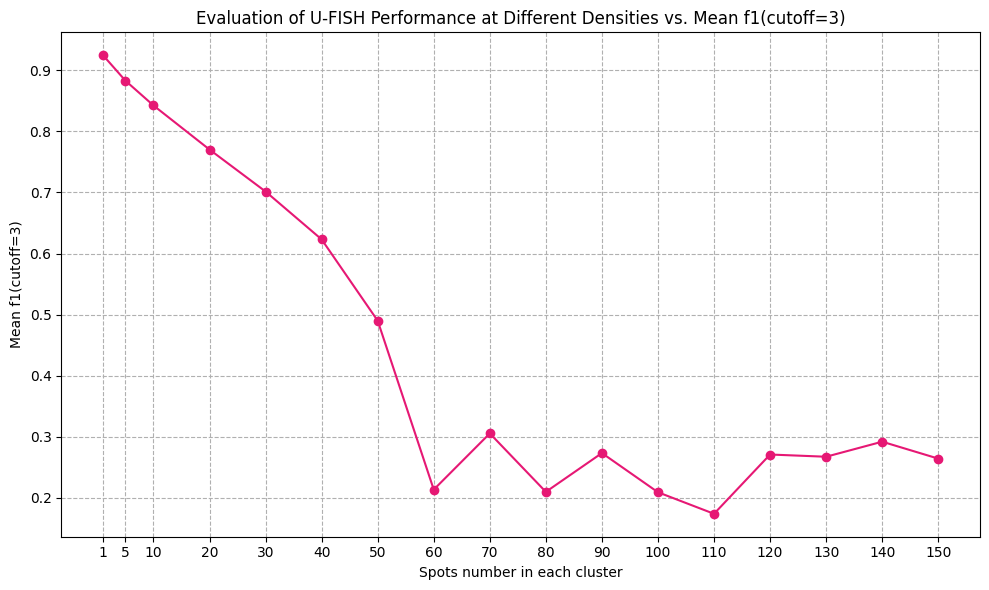

In [ ]:
# plot
import pandas as pd
import matplotlib.pyplot as plt
import re

df = pd.read_csv("D:/data/ufish/test_density/uf_density_f1.csv")


df['density'] = df['source'].apply(lambda x: int(re.search(r'density(\d+)', x).group(1)) 
                                   if re.search(r'density(\d+)', str(x)) else None)
df = df.dropna(subset=['density']) 

f1_column_name = 'f1(cutoff=3)' 

possible_f1_columns = [col for col in df.columns if 'f1' in col.lower()]

df[f1_column_name] = pd.to_numeric(df[f1_column_name], errors='coerce')
df = df.dropna(subset=[f1_column_name]) 

density_f1 = df.groupby('density')[f1_column_name].mean().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
density_f1.plot(kind='line', marker='o', color='#e61874')
plt.title('Evaluation of U-FISH Performance at Different Densities')
plt.xlabel('Spots number in each cluster')
plt.ylabel(f'Mean {f1_column_name}')
plt.xticks(density_f1.index)
plt.grid(True, linestyle='--', which='both')
plt.tight_layout()
plt.rcParams['pdf.fonttype'] = 42 
plt.rcParams['ps.fonttype'] = 42

output_plot_path = "density_f1_plot.pdf"
plt.savefig(output_plot_path)

plt.show() 


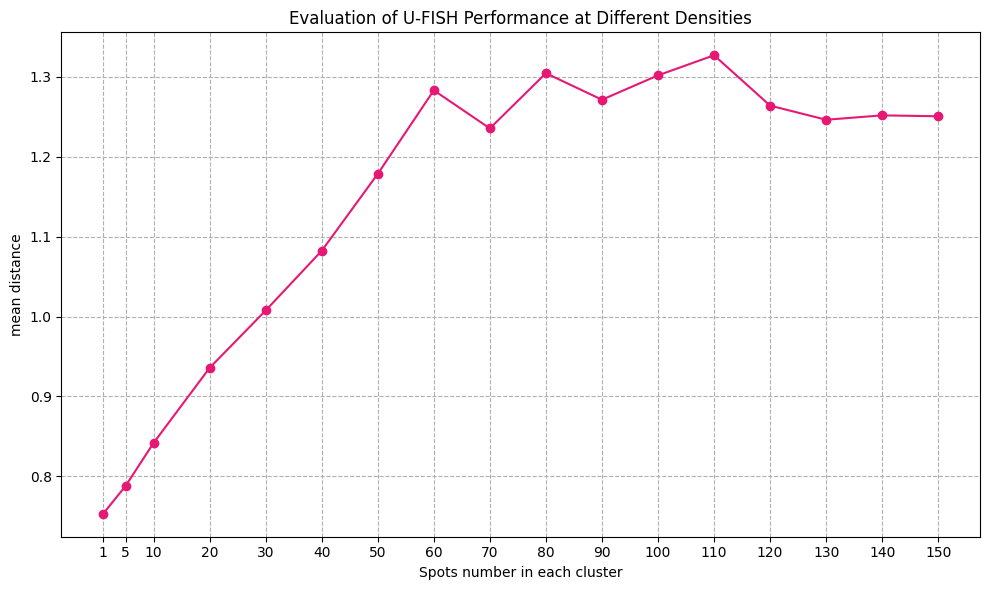

In [84]:
# plot

df['density'] = df['source'].apply(lambda x: int(re.search(r'density(\d+)', x).group(1)) 
                                   if re.search(r'density(\d+)', str(x)) else None)
df = df.dropna(subset=['density']) 

f1_column_name = 'mean distance' 

possible_f1_columns = [col for col in df.columns if 'distance' in col.lower()]

df[f1_column_name] = pd.to_numeric(df[f1_column_name], errors='coerce')
df = df.dropna(subset=[f1_column_name]) 

density_f1 = df.groupby('density')[f1_column_name].mean().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
density_f1.plot(kind='line', marker='o', color='#e61874')
plt.title('Evaluation of U-FISH Performance at Different Densities')
plt.xlabel('Spots number in each cluster')
plt.ylabel(f'{f1_column_name}')
plt.xticks(density_f1.index)
plt.grid(True, linestyle='--', which='both')
plt.tight_layout()
plt.rcParams['pdf.fonttype'] = 42 
plt.rcParams['ps.fonttype'] = 42

output_plot_path = "density_distance_plot.pdf"
plt.savefig(output_plot_path)

plt.show() 
